In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering , DBSCAN , KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import dendrogram , linkage , cophenet


In [2]:
plt.rcParams["figure.figsize"] = [15,10]

In [23]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.shape

(1599, 12)

In [25]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [26]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


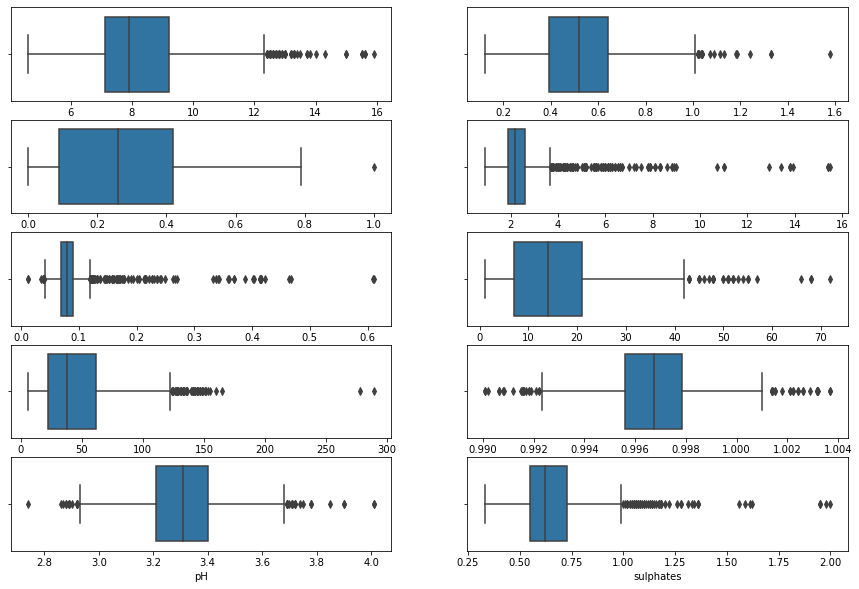

In [28]:
fig , ax = plt.subplots(nrows=5 , ncols=2 , figsize=(15,10))

for var , subplot in zip(df.columns , ax.flatten()):
    sns.boxplot(df[var] , ax = subplot)
    
    
plt.show()

In [29]:
# write your code here
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(1179, 12)

In [30]:
ss = StandardScaler()

scaled_num = ss.fit_transform(df)

In [33]:
link_mat = linkage(scaled_num , method = 'ward')

link_mat

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [5.19000000e+02, 5.20000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.22000000e+02, 1.18000000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.35000000e+03, 2.35200000e+03, 4.16257567e+01, 6.23000000e+02],
       [2.35300000e+03, 2.35400000e+03, 5.77808418e+01, 9.36000000e+02],
       [2.35100000e+03, 2.35500000e+03, 5.97216846e+01, 1.17900000e+03]])

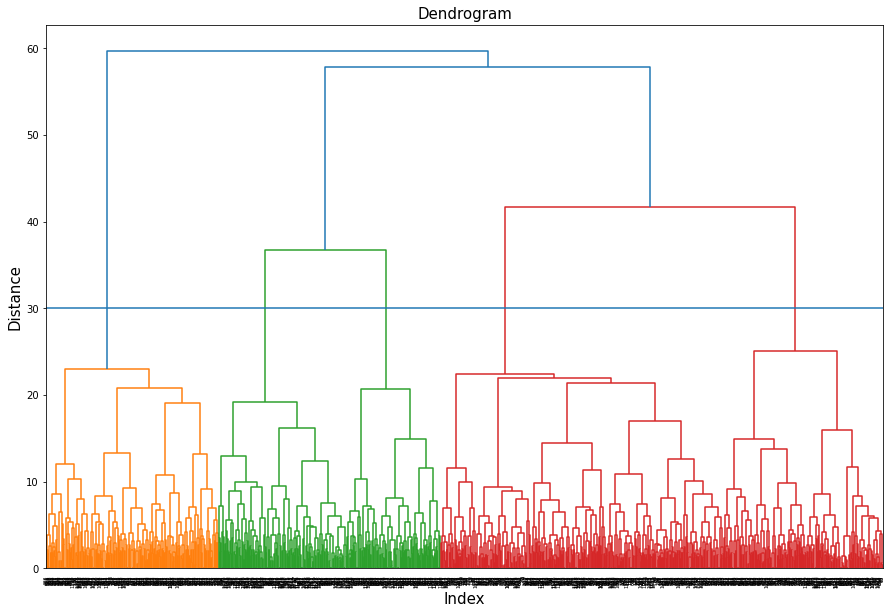

In [35]:
dendo = dendrogram(link_mat)
plt.axhline(30)
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

In [37]:
l1 = []

n_cluster = [2,3,4,5,6,7,8]

for i in n_cluster:
    cluster = KMeans(n_clusters=i , random_state=10)
    predict = cluster.fit_predict(scaled_num)
    score = silhouette_score(scaled_num , predict , random_state=10)
    l1.append(score)
    

In [38]:
l1

[0.18771049650840604,
 0.16219924294406554,
 0.15226830466910046,
 0.14700102209682323,
 0.1399148386789084,
 0.1389857845847203,
 0.11914912998092096]

<AxesSubplot:>

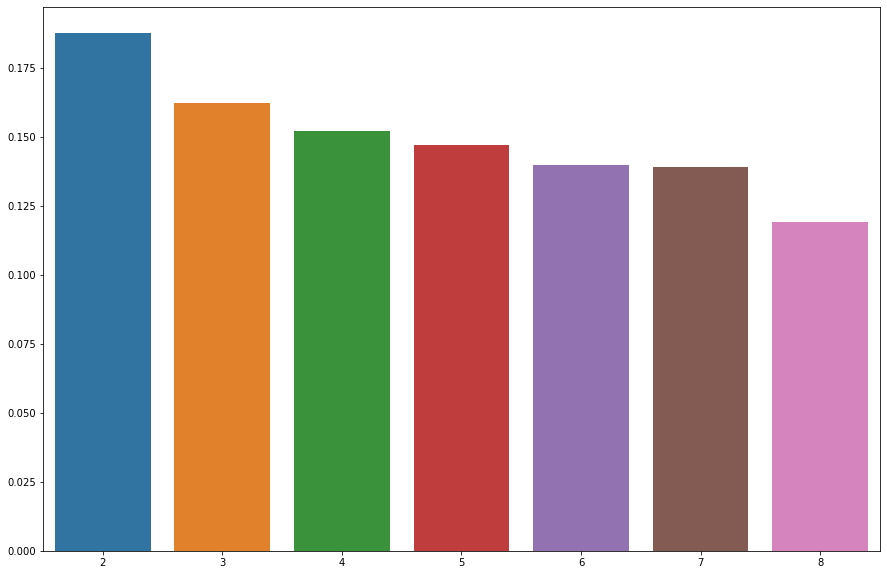

In [39]:
sns.barplot(n_cluster , l1)

In [40]:
eucli_dist = euclidean_distances(scaled_num) 

dist_array = eucli_dist[np.triu_indices(1179 , k=1)]

coeff , cophent_dist = cophenet(link_mat , dist_array)

coeff

0.4583168564879479

In [41]:
agglo = AgglomerativeClustering(n_clusters=2 , linkage='ward')
agglo.fit(scaled_num)

AgglomerativeClustering()

In [42]:
df["cluster"] = agglo.labels_

In [43]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


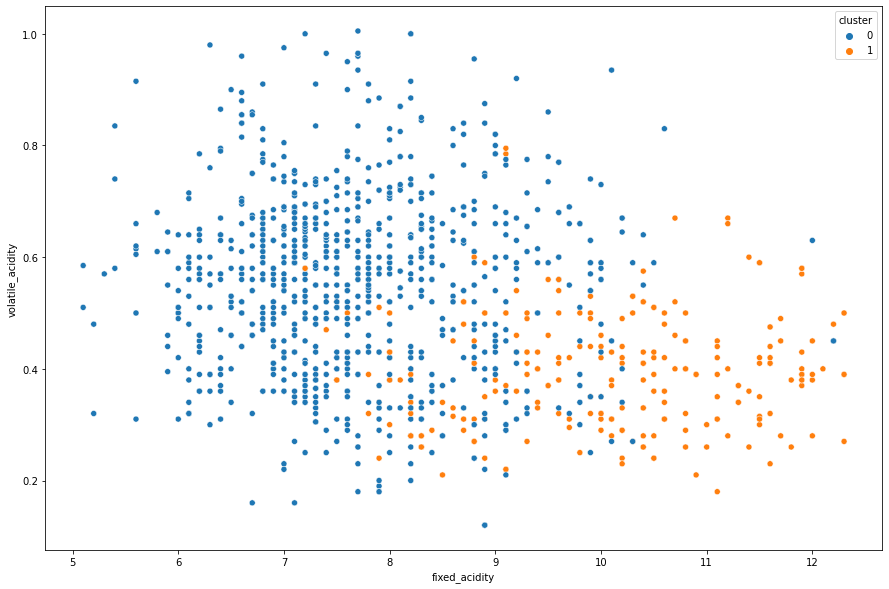

In [44]:
sns.scatterplot(data=df,x='fixed_acidity',y='volatile_acidity',hue='cluster')
plt.show()

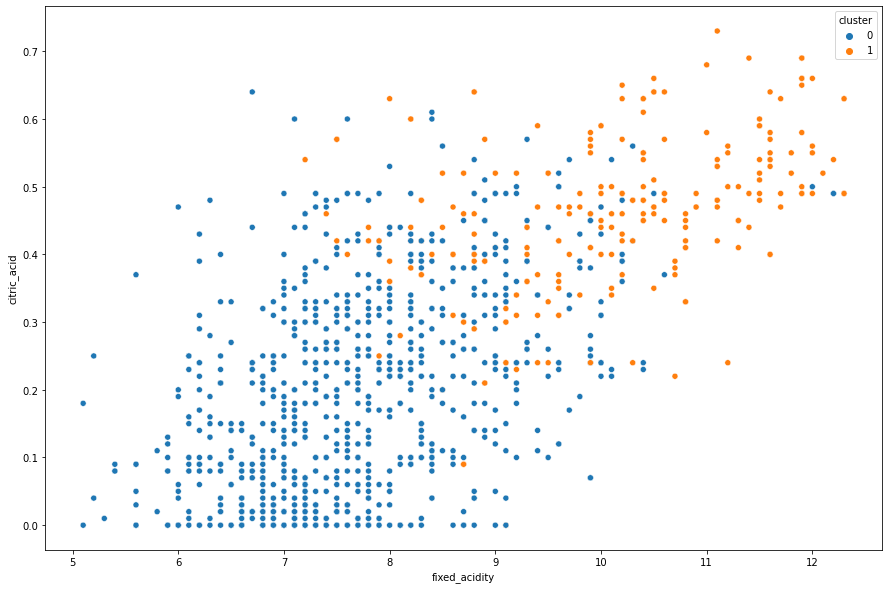

In [45]:
sns.scatterplot(data=df,x='fixed_acidity',y='citric_acid',hue='cluster')
plt.show()

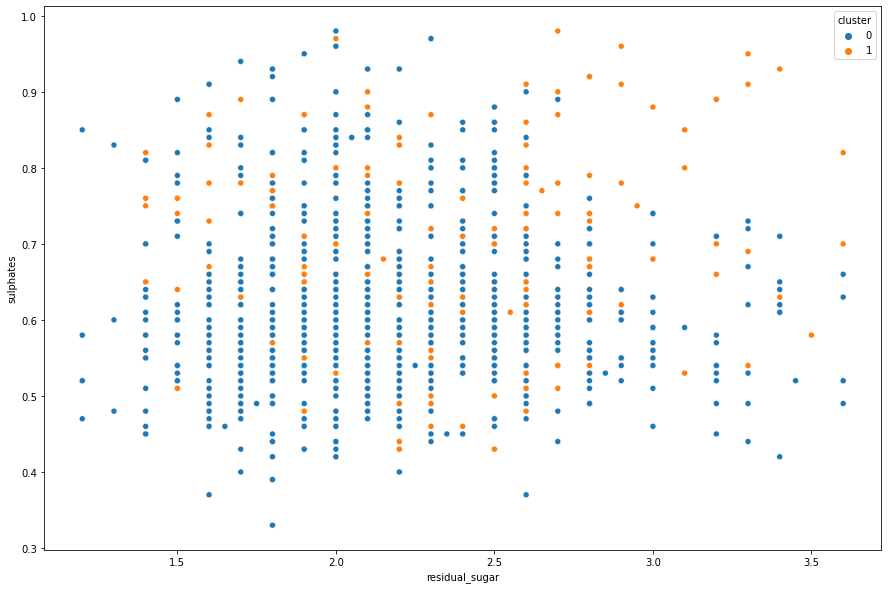

In [46]:
sns.scatterplot(data=df,x='residual_sugar',y='sulphates',hue='cluster')
plt.show()

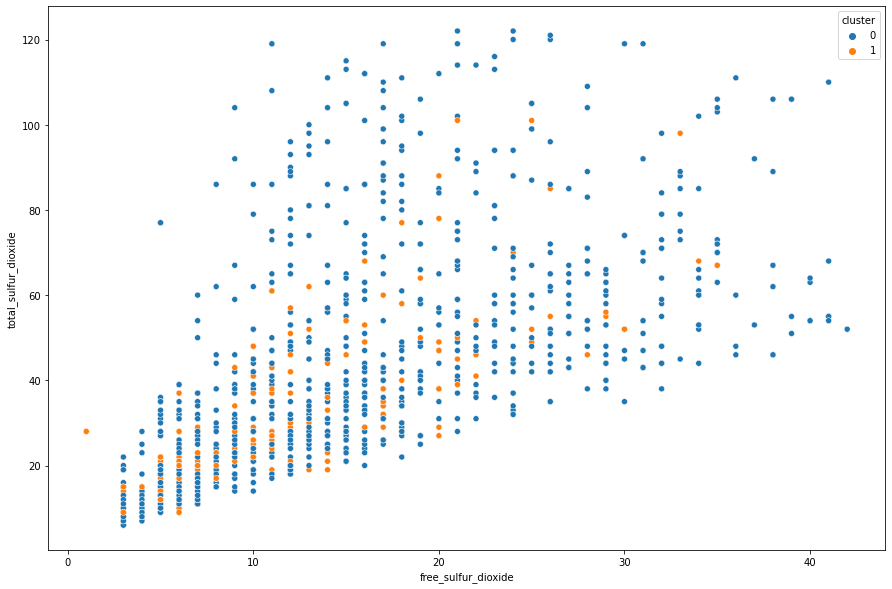

In [47]:
sns.scatterplot(data=df,x='free_sulfur_dioxide',y='total_sulfur_dioxide',hue='cluster')
plt.show()

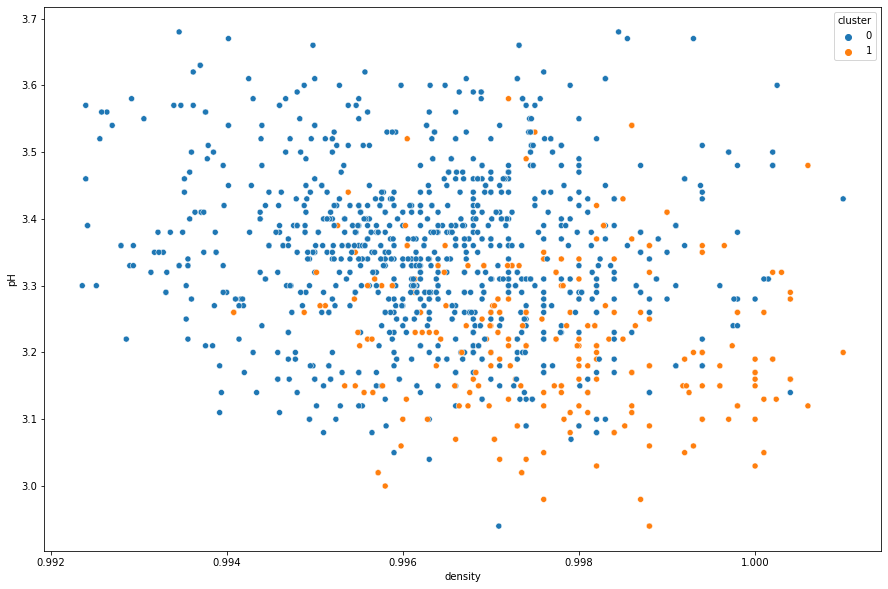

In [48]:
sns.scatterplot(data=df,x='density',y='pH',hue='cluster')
plt.show()